In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

# IB Calibration

In [2]:
Currents = np.array([2.764, 2.896, 2.968, 3.083, 3.174, 3.278, 3.402, 3.526, 3.647, 3.777]) #Amps
Fields = np.array([3697, 3814, 3905, 4011, 4104, 4199, 4309, 4413, 4510, 4594])*1e-4 #Tesla

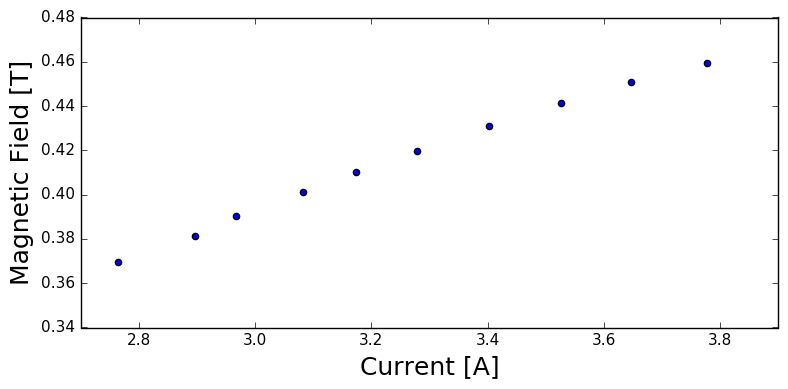

In [3]:
plt.figure(figsize=(9,4))
plt.scatter(Currents, Fields);
plt.xlim(2.7,3.9);
#plt.ylim(0,2500)
plt.xlabel('Current [A]',size=18);
plt.ylabel('Magnetic Field [T]',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);

In [4]:
def myfun(A,b,c):
    ans = b*A + c*A**2  # this is y, "the function to be fit"
    return ans

In [5]:
p0 = [1.5/4,0]

In [6]:
xlots = np.linspace(2.6,3.9,500)  # need lots of data points for smooth curve
yfit = np.zeros((len(Currents),xlots.size))

plsq, pcov = curve_fit(myfun, Currents, Fields, p0,sigma = 0.2)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
b = plsq[0]
eb = np.sqrt(pcov[0,0])
c = plsq[1]
ec = np.sqrt(pcov[1,1])


yfit = myfun(xlots,plsq[0],plsq[1])  # use fit results for a, b, c
    
print('b = %.3f +/- %.3f' % (plsq[0], np.sqrt(pcov[0,0])))
print('c = %.3f +/- %.3f' % (plsq[1], np.sqrt(pcov[1,1])))

b = 0.166 +/- 0.001
c = -0.012 +/- 0.000


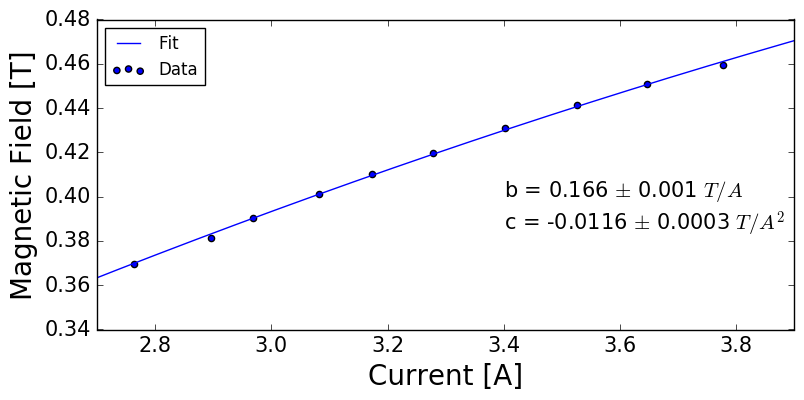

In [7]:
plt.figure(figsize=(9,4))
plt.scatter(Currents, Fields);
plt.xlim(2.7,3.9);
#plt.ylim(0,2500)
plt.xlabel('Current [A]',size=20);
plt.ylabel('Magnetic Field [T]',size=20);
plt.xticks(size = 15);
plt.yticks(size = 15);
plt.text(3.4, 0.4, 'b = %.3f $\pm$ %.3f $T/A$' %(b,eb), fontsize=15)
plt.text(3.4, 0.385, 'c = %.4f $\pm$ %.4f $T/A^2$' %(c,ec), fontsize=15)
#plt.text(3.4, 0.37, 'c = %.2f $\pm$ %.2f $G/A^2$' %(c,ec), fontsize=15)
#plt.text(3.4, 0.355, 'd = %.3f $\pm$ %.3f $G/A^3$' %(d,ed), fontsize=15)
plt.plot(xlots,yfit);
plt.legend(['Fit','Data'],loc='best');
#plt.savefig('FieldFit.png')

### Finding Fit Uncertainty

In [8]:
def myfunUnc(A,eA,b,c,eb,ec): #Returns dB. B =  b*A + c*A**2
    #d1 = ea
    #d2 = np.sqrt((A*eb)**2 + (b*eA)**2)
    #d3 = np.sqrt((ec*A**2)**2 + (2*A*c*eA)**2)
    #d4 = np.sqrt((ed*A**3)**2 + (3*d*eA*A**2)**2)
    #return np.sqrt(d1**2 + d2**2 + d3**2 + d4**2)
    return np.sqrt((A*eb)**2 + (ec*A**2)**2 + ((b + 2*c*A)*eA)**2 )

# Water Resonance

In [9]:
WaterCurrents = np.array([2.989, 3.037, 3.131, 3.244, 3.318, 3.396, 3.472, 3.569]) #Amps
eWaterCurrents = 0.001
WaterRF = np.array([17.06, 17.26, 17.65, 18.11, 18.35, 18.64, 18.94, 19.28])*1e6 #Hz

WaterFields = myfun(WaterCurrents,b,c) #Tesla
WaterFields

array([ 0.39221143,  0.39681611,  0.40567853,  0.4160605 ,  0.42269852,
        0.4295576 ,  0.43610482,  0.44426615])

In [10]:
eWaterFields = myfunUnc(WaterCurrents,eWaterCurrents,b,c,eb,ec)
eWaterFields

array([ 0.004119  ,  0.0042152 ,  0.00440714,  0.00464413,  0.00480307,
        0.00497382,  0.00514341,  0.00536449])

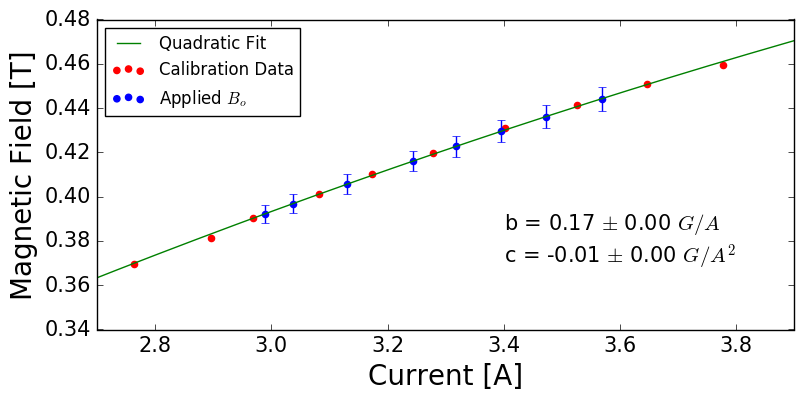

In [11]:
plt.figure(figsize=(9,4))
plt.scatter(Currents, Fields,label='Calibration Data',color='red');
plt.scatter(WaterCurrents,WaterFields,color='blue',label='Applied $B_o$')
plt.errorbar(WaterCurrents,WaterFields,eWaterFields,fmt='none')
plt.xlim(2.7,3.9);
#plt.ylim(0,2500)
plt.xlabel('Current [A]',size=20);
plt.ylabel('Magnetic Field [T]',size=20);
plt.xticks(size = 15);
plt.yticks(size = 15);
plt.text(3.4, 0.385, 'b = %.2f $\pm$ %.2f $G/A$' %(b,eb), fontsize=15)
plt.text(3.4, 0.37, 'c = %.2f $\pm$ %.2f $G/A^2$' %(c,ec), fontsize=15)
plt.plot(xlots,yfit,label='Quadratic Fit');
plt.legend(loc='best');
#plt.savefig('FieldFit.png')

Need to fit line to resonance with B and determine constants

## Exponential Decay of peak amplitude

In [37]:
Time = np.array([0, 106, 190, 262, 324, 380, 432, 482, 528, 560, 612, 652, 688, 726])*1e-6 #Seconds
Amplitude = np.array([4.325, 3.625, 2.8, 2.45, 2.15, 1.7, 1.45, 1.3, 1.05, 1.025, 0.825, 0.775, 0.75, 0.525]) #Volts

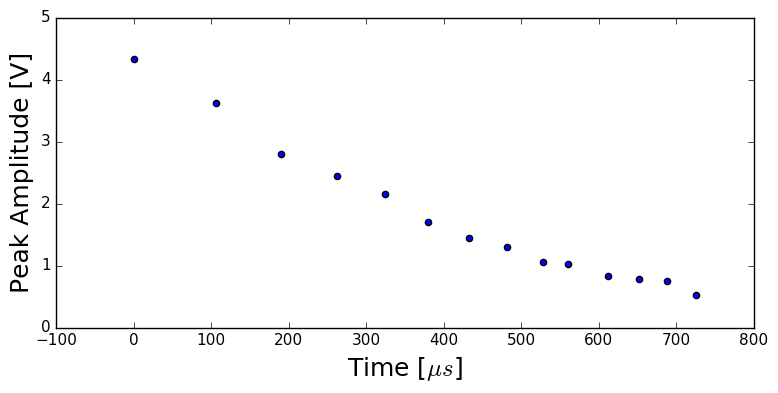

In [42]:
plt.figure(figsize=(9,4))
plt.scatter(Time*1e6, Amplitude);
#plt.xlim(2.7,3.9);
#plt.ylim(0,2500)
plt.xlabel('Time [$\mu s$]',size=18);
plt.ylabel('Peak Amplitude [V]',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);

Need to fit this and determine a time constant. Also account for every other measurement being slightly offset?

# PTFE Resonance

In [24]:
PTFECurrents = np.array([2.9, 3.001, 3.099, 3.26, 3.256, 3.34, 3.45, 3.545, 3.652, 3.763, 3.848, 3.95]) #Amps
ePTFECurrents = 0.001
PTFERF = np.array([15.77, 16.15, 16.53, 17.32, 17.33, 17.51, 17.86, 18.02, 18.34, 18.67, 18.93, 19.19])*1e6 #Hz

PTFEFields = myfun(PTFECurrents,b,c) #Tesla
PTFEFields

array([ 0.38353191,  0.39336762,  0.40268459,  0.41750653,  0.41714558,
        0.42464745,  0.43422337,  0.44226721,  0.45107597,  0.45993288,
        0.46652161,  0.47420647])

In [25]:
ePTFEFields = myfunUnc(PTFECurrents,ePTFECurrents,b,c,eb,ec)
ePTFEFields

array([ 0.00394382,  0.00414293,  0.00434127,  0.00467824,  0.0046697 ,
        0.00485089,  0.00509399,  0.0053093 ,  0.00555781,  0.00582236,
        0.00602964,  0.00628377])

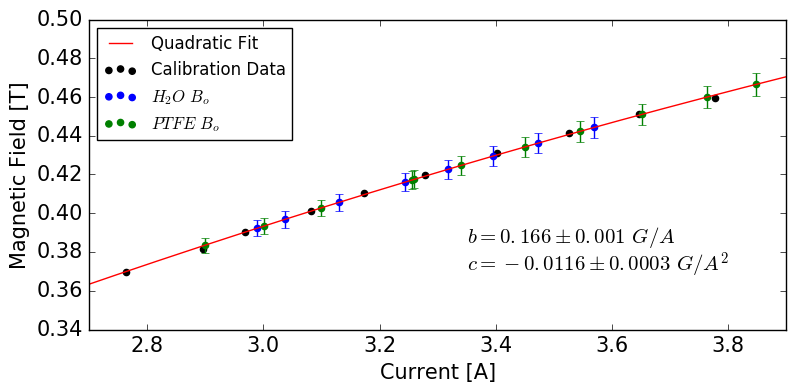

In [50]:
plt.figure(figsize=(9,4))
plt.scatter(Currents, Fields,label='Calibration Data',color='black');
plt.scatter(WaterCurrents,WaterFields,color='blue',label='$H_2 O$ $B_o$')
plt.errorbar(WaterCurrents,WaterFields,eWaterFields,fmt='none')

plt.scatter(PTFECurrents,PTFEFields,color='green',label='$PTFE$ $B_o$')
plt.errorbar(PTFECurrents,PTFEFields,ePTFEFields,fmt='none')

plt.xlim(2.7,3.9);
#plt.ylim(0,2500)
plt.xlabel('Current [A]',size=15);
plt.ylabel('Magnetic Field [T]',size=15);
plt.xticks(size = 15);
plt.yticks(size = 15);
plt.text(3.35, 0.385, '$b = %.3f \pm %.3f$ $G/A$' %(b,eb), fontsize=15)
plt.text(3.35, 0.37, '$c = %.4f \pm %.4f$ $G/A^2$' %(c,ec), fontsize=15)
plt.plot(xlots,yfit,label='Quadratic Fit');
plt.legend(loc='best');
plt.savefig('FieldFit.png')

Need to fit line to resonance with B and determine constants

## Linespacing with $f$

In [45]:
fo = 17.4785*1e6
efo = 0.0002*1e6


Times = np.array([3.18, 6, 9.24, 7.25, 4.65])*1e-3 #Seconds
Frequencies = np.array([17.5855, 17.6614, 17.6368, 17.614, 17.5989])*1e6 #MHz

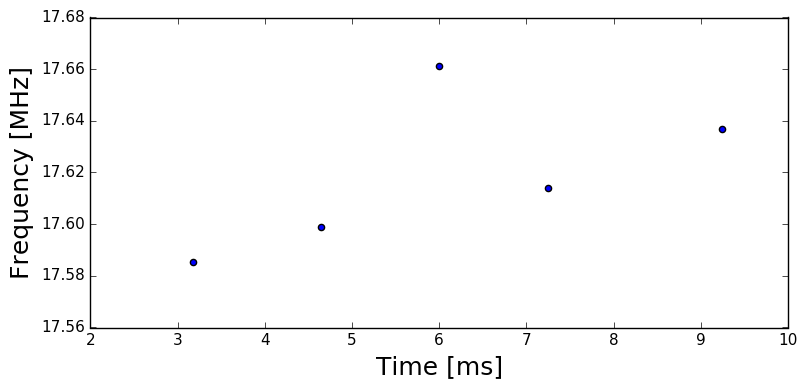

In [47]:
plt.figure(figsize=(9,4))
plt.scatter(Times*1e3, Frequencies*1e-6);
#plt.xlim(2.7,3.9);
#plt.ylim(0,2500)
plt.xlabel('Time [ms]',size=18);
plt.ylabel('Frequency [MHz]',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);